In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [3]:
stipendi_df_raw = pd.read_csv('ds_salaries.csv')
stipendi_df_raw

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
jobs_list = []
new_job = ""
for job_title in stipendi_df_raw["job_title"]:
    if "ML" in job_title:
        new_job = "Machine Learning Engineer"
        
    if "Machine Learning" not in job_title and "Engineer" in job_title:
        new_job = "Data Engineer"
        
    if "Analyst" in job_title or 'Analytics' in job_title:
        new_job = "Data Analyst"
    
    if "Machine Learning" in job_title or "Computer Vision" in job_title or "NLP" in job_title or "AI Scientist" in job_title:
        new_job = "AI Professionals"
    
    if "Scientist" in job_title and "AI" not in job_title or "Data Science" in job_title:
        new_job = "Data Scientist"
    jobs_list.append(new_job)
    
simple_df = stipendi_df_raw.drop(['job_title', 'work_year', 'experience_level', 'employment_type',
       'salary', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'], axis = 1)
job_series = pd.Series(jobs_list)
simple_df["job_category"]= job_series

In [5]:
stipendi_df_raw['job_category'] = simple_df['job_category']
stipendi_df_raw

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Data Scientist
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Data Engineer
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Data Analyst
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,AI Professionals
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,Data Engineer
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,Data Engineer
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,Data Analyst
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,Data Analyst


In [6]:
stipendi_df_raw.drop(['Unnamed: 0'], axis= 1, inplace= True)
stipendi_df_raw

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Data Scientist
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Data Engineer
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,AI Professionals
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,Data Engineer
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,Data Engineer
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,Data Analyst
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,Data Analyst


In [7]:
stipendi_df = stipendi_df_raw.copy()

stipendi_df = stipendi_df[(stipendi_df['employment_type'] != 'PT') & (stipendi_df['employment_type'] != 'CT') & (stipendi_df['employment_type'] != 'FL')]
stipendi_df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Data Scientist
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Data Engineer
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,AI Professionals


In [8]:
subset_stipendio_paese = stipendi_df[['job_title', 'salary_in_usd', 'company_location']]
subset_stipendio_paese

,job_title,salary_in_usd,company_location
0,Data Scientist,79833,DE
1,Machine Learning Scientist,260000,JP
2,Big Data Engineer,109024,GB
3,Product Data Analyst,20000,HN
4,Machine Learning Engineer,150000,US
...,...,...,...
602,Data Engineer,154000,US
603,Data Engineer,126000,US
604,Data Analyst,129000,US
605,Data Analyst,150000,US


In [9]:
subset_stipendio_paese.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'AI Scientist',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       'Data Analytics Engineer', 'Applied Data Scientist',
       'Marketing Data Analyst', 'Cloud Data Engineer',
       'Financial Data Analyst', 'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       'Applied Machine Learning Scientist', 'Computer Vision Engineer',
       'ML Engineer', 'D

In [10]:
stipendi_df.employment_type.value_counts()

employment_type
FT    588
Name: count, dtype: int64

In [11]:
subset_stipendio_paese['job_title'].value_counts().head(4)

job_title
Data Scientist               140
Data Engineer                129
Data Analyst                  96
Machine Learning Engineer     41
Name: count, dtype: int64

In [12]:
subset_stipendio_grandezza_compagnia = stipendi_df.groupby(['company_size'], as_index= False)['salary_in_usd'].mean().sort_values('salary_in_usd', ascending= False)
subset_stipendio_grandezza_compagnia.columns = ['company_size', 'avg_salary_in_usd']

<Axes: xlabel='company_size', ylabel='avg_salary_in_usd'>

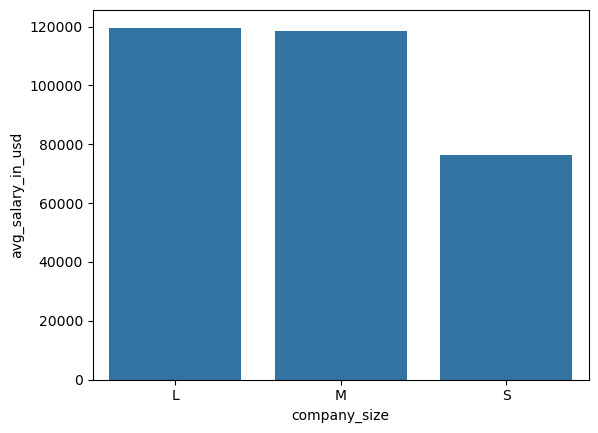

In [13]:
sns.barplot(data= subset_stipendio_grandezza_compagnia, x= 'company_size', y= 'avg_salary_in_usd')


In [14]:
lavori = ["Data Scientist","Data Engineer", "Data Analyst", "Machine Learning Engineer"]
subset_ruoli_diffusi = stipendi_df[stipendi_df["job_title"].isin(lavori)]
subset_ruoli_diffusi.head(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,AI Professionals
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,Data Analyst
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,Data Scientist
10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S,Data Scientist
11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L,Data Scientist
12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M,Data Scientist
14,2020,MI,FT,Data Analyst,85000,USD,85000,US,100,US,L,Data Analyst
15,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L,Data Analyst
16,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S,Data Engineer


In [15]:
ruoli_per_grandezza = stipendi_df.groupby(['job_category', 'company_size'], as_index= False)['salary_in_usd'].mean().sort_values('salary_in_usd', ascending= False)
ruoli_per_grandezza.columns = ('job_category', 'company_size', 'avg_salary_in_usd')
ruoli_per_grandezza

,job_category,company_size,avg_salary_in_usd
10,Data Scientist,M,132254.632653
9,Data Scientist,L,124392.622222
7,Data Engineer,M,119992.177083
6,Data Engineer,L,119929.250000
3,Data Analyst,L,116766.000000
1,AI Professionals,M,112120.838710
4,Data Analyst,M,105146.182796
0,AI Professionals,L,102833.250000
8,Data Engineer,S,97225.117647
2,AI Professionals,S,79722.944444


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


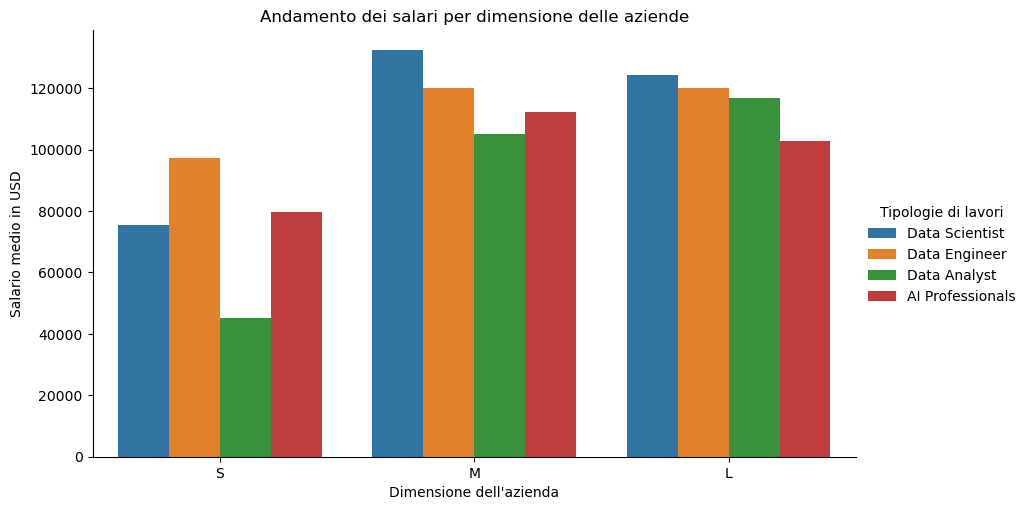

In [16]:
andamento_salari = sns.catplot(data= ruoli_per_grandezza, x= 'company_size', y= 'avg_salary_in_usd', kind= 'bar', hue= 'job_category', aspect= 16/9, order= ['S', 'M', 'L'])
plt.title('Andamento dei salari per dimensione delle aziende')
plt.xlabel('Dimensione dell\'azienda')
plt.ylabel('Salario medio in USD')
andamento_salari._legend.set_title('Tipologie di lavori')
plt.savefig('andamento_salari_dimensione.png');
print(plt.style.available)

In [17]:
subset_ruoli_diffusi['job_title'].value_counts()

job_title
Data Scientist               140
Data Engineer                129
Data Analyst                  96
Machine Learning Engineer     41
Name: count, dtype: int64

In [18]:
stipendi_df['job_category'].value_counts()

job_category
Data Scientist      218
Data Engineer       161
Data Analyst        140
AI Professionals     69
Name: count, dtype: int64

In [19]:
stipendi_df['experience_level'].value_counts()

experience_level
SE    278
MI    206
EN     79
EX     25
Name: count, dtype: int64

In [20]:
stipendi_df["remote_ratio"].value_counts()[0]
stipendi_df["remote_ratio"].value_counts()[50]
stipendi_df["remote_ratio"].value_counts()[100]

370

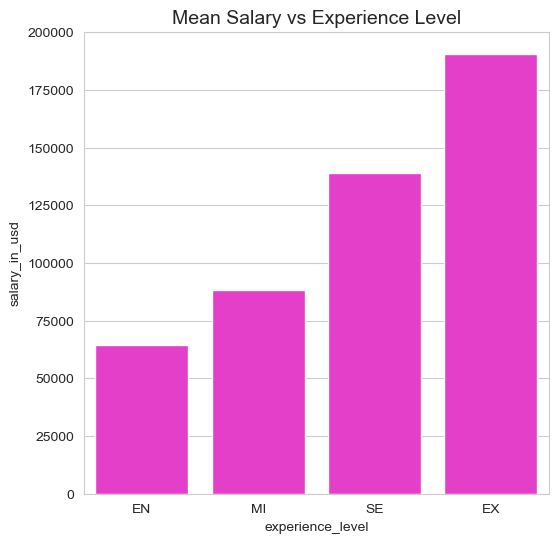

In [21]:
mean_salary_experience = stipendi_df.groupby("experience_level")["salary_in_usd"].mean().sort_values()

sns.set_style("whitegrid")

plt.figure(figsize=(6, 6))
sns.set_palette("spring")

plt.plot
ax = sns.barplot(x=mean_salary_experience.index, y=mean_salary_experience)
ax.set_title("Mean Salary vs Experience Level", fontdict={'fontsize': 14});

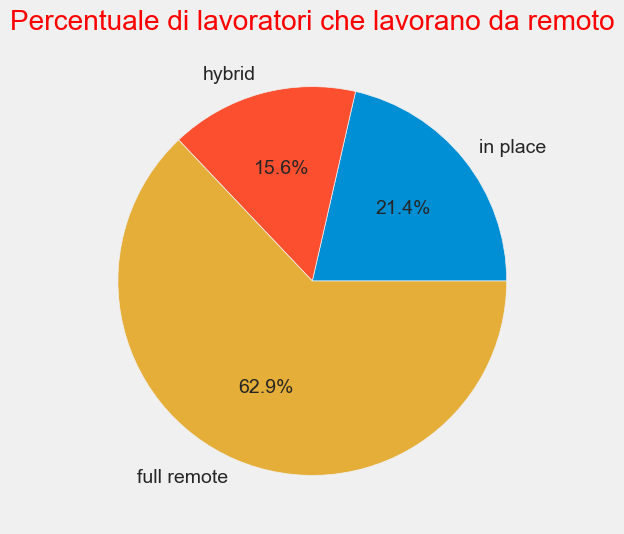

In [22]:


lavori_da_remoto = [stipendi_df["remote_ratio"].value_counts()[0], stipendi_df["remote_ratio"].value_counts()[50], stipendi_df["remote_ratio"].value_counts()[100]]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))

plt.pie(lavori_da_remoto, labels= ["in place","hybrid","full remote"],autopct='%1.1f%%')
plt.title("Percentuale di lavoratori che lavorano da remoto", c = "r")
plt.show()

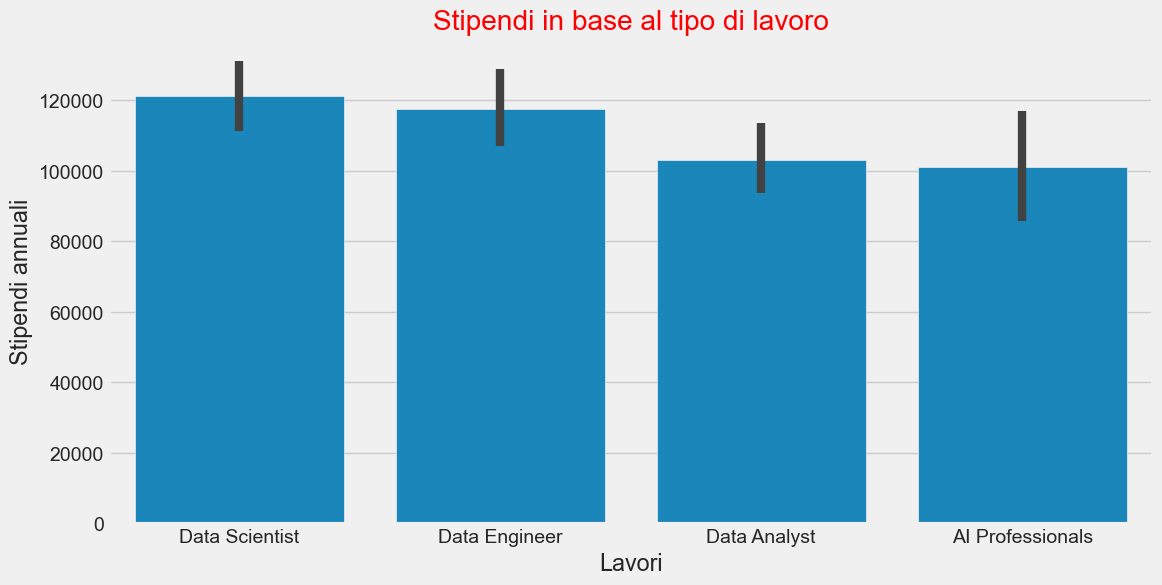

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))
sns.barplot(data = stipendi_df, x = "job_category", y = 'salary_in_usd')


plt.title("Stipendi in base al tipo di lavoro", c= "r")
plt.xlabel('Lavori')
plt.ylabel('Stipendi annuali');

In [24]:
subset_per_heatmap = stipendi_df.drop(['salary'], axis = 1)

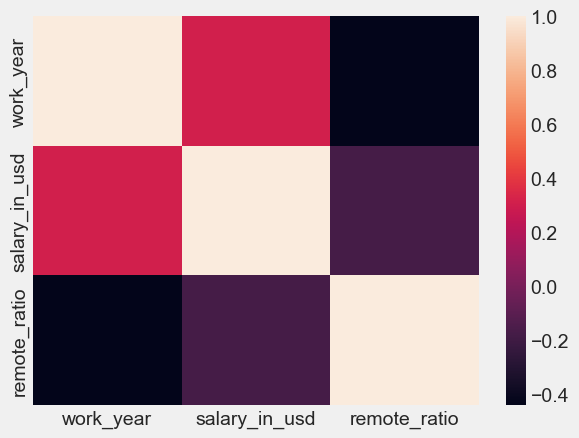

In [25]:
sns.heatmap(subset_per_heatmap.describe().corr());

In [26]:
subset_estremi_de = stipendi_df[stipendi_df['job_category'] == 'Data Engineer']

subset_estremi_de = subset_estremi_de.sort_values('salary_in_usd', ascending=False)

subset_estremi_de

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L,Data Engineer
482,2022,EX,FT,Data Engineer,324000,USD,324000,US,100,US,M,Data Engineer
93,2021,SE,FT,Lead Data Engineer,276000,USD,276000,US,0,US,L,Data Engineer
231,2021,SE,FT,ML Engineer,256000,USD,256000,US,100,US,S,Data Engineer
337,2022,SE,FT,Data Engineer,243900,USD,243900,US,100,US,M,Data Engineer
...,...,...,...,...,...,...,...,...,...,...,...,...
192,2021,MI,FT,Big Data Engineer,18000,USD,18000,MD,0,MD,S,Data Engineer
230,2021,EN,FT,Big Data Engineer,1200000,INR,16228,IN,100,IN,L,Data Engineer
247,2021,MI,FT,Data Engineer,108000,TRY,12103,TR,0,TR,M,Data Engineer
213,2021,EN,FT,Big Data Engineer,435000,INR,5882,IN,0,CH,L,Data Engineer


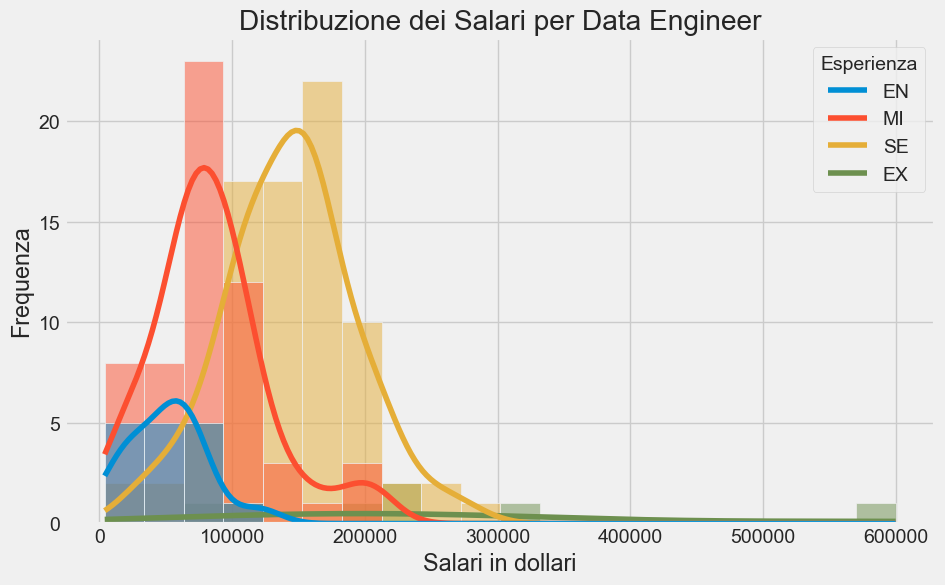

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data= subset_estremi_de, x = 'salary_in_usd', kde= True, hue = 'experience_level', hue_order=['EN', 'MI', 'SE', 'EX'], legend= True)

plt.title('Distribuzione dei Salari per Data Engineer')
plt.xlabel('Salari in dollari')
plt.ylabel('Frequenza')
plt.legend(labels= ['EX', 'SE', 'MI', 'EN'], reverse= True, title = "Esperienza")
plt.savefig('')
plt.show()

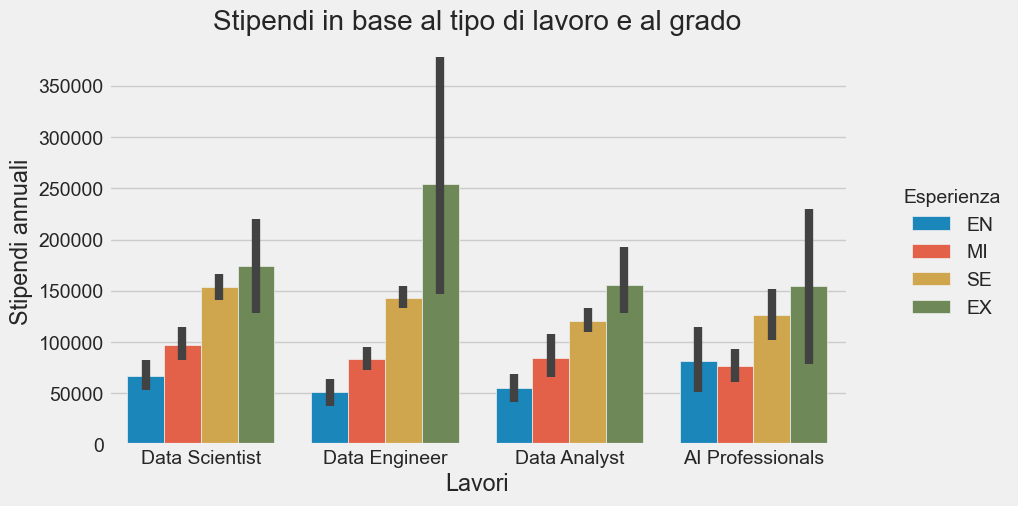

In [28]:
g = sns.catplot(data= stipendi_df, 
            x= "job_category",
            y= 'salary_in_usd',
            kind= "bar", 
            hue= "experience_level",
            hue_order=["EN", "MI", "SE", "EX"],
            aspect= 16/9)
g._legend.set_title("Esperienza")

plt.title("Stipendi in base al tipo di lavoro e al grado")
plt.xlabel('Lavori')
plt.ylabel('Stipendi annuali')
plt.savefig('stipendi_tipo_lavoro_grado.png');

Text(0, 0.5, 'Frequenza')

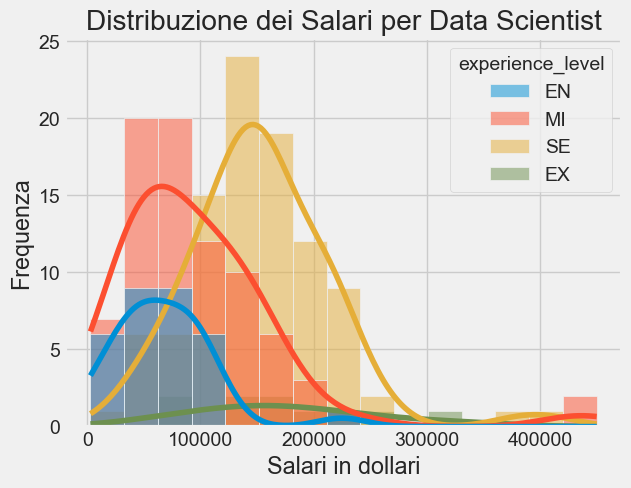

In [29]:
subset_estremi_ds = stipendi_df[stipendi_df['job_category'] == 'Data Scientist']

subset_estremi_ds = subset_estremi_ds.sort_values('salary_in_usd', ascending=False)

sns.histplot(data= subset_estremi_ds, x = 'salary_in_usd', kde= True, hue = 'experience_level', hue_order=['EN', 'MI', 'SE', 'EX'])

# plt.figure(figsize=(10, 6))
# plt.hist(subset_estremi_ds['salary_in_usd'], bins=20)

plt.title('Distribuzione dei Salari per Data Scientist')
plt.xlabel('Salari in dollari')
plt.ylabel('Frequenza')

# plt.show()

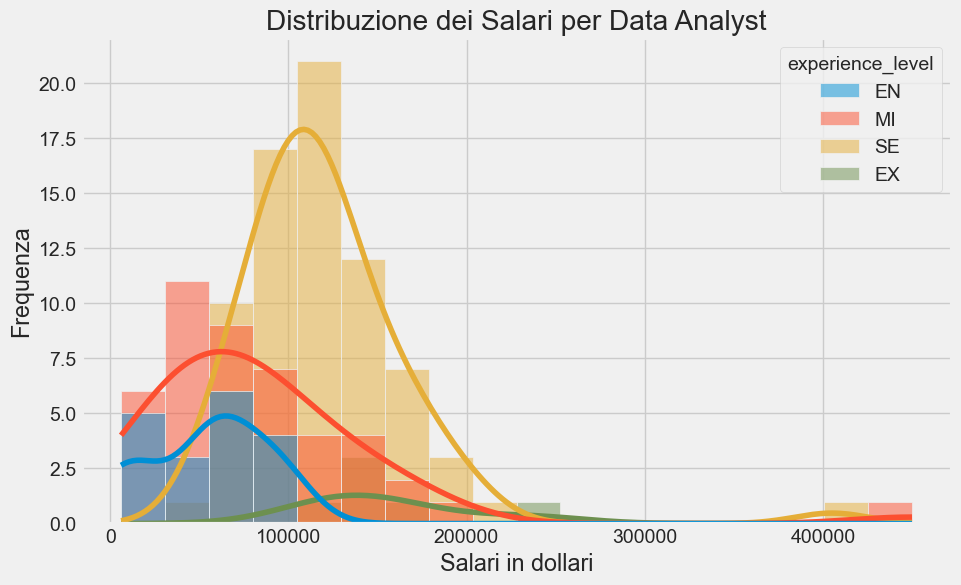

In [30]:
subset_estremi_da = stipendi_df_raw[stipendi_df_raw['job_category'] == 'Data Analyst']

subset_estremi_da = subset_estremi_da.sort_values('salary_in_usd', ascending=False)

plt.figure(figsize=(10, 6))
sns.histplot(data= subset_estremi_da, x = 'salary_in_usd', kde= True, hue = 'experience_level', hue_order=['EN', 'MI', 'SE', 'EX'])

plt.title('Distribuzione dei Salari per Data Analyst')
plt.xlabel('Salari in dollari')
plt.ylabel('Frequenza')

plt.show()

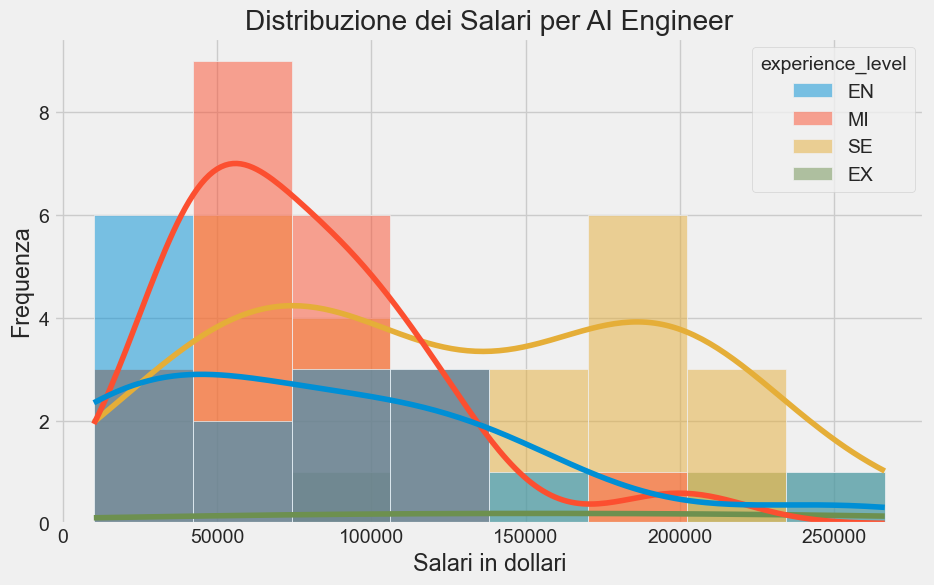

In [31]:
subset_estremi_aie = stipendi_df[stipendi_df['job_category'] == 'AI Professionals']

subset_estremi_aie = subset_estremi_aie.sort_values('salary_in_usd', ascending=False)


plt.figure(figsize=(10, 6))
sns.histplot(data= subset_estremi_aie, x = 'salary_in_usd', kde= True, hue = 'experience_level', hue_order=['EN', 'MI', 'SE', 'EX'])

plt.title('Distribuzione dei Salari per AI Engineer')
plt.xlabel('Salari in dollari')
plt.ylabel('Frequenza')

plt.show()

In [32]:
subset_employment_type = stipendi_df.groupby('job_category')['employment_type'].value_counts()
subset_employment_type

job_category      employment_type
AI Professionals  FT                  69
Data Analyst      FT                 140
Data Engineer     FT                 161
Data Scientist    FT                 218
Name: count, dtype: int64

In [33]:
# Creo il dizionario per la conversione

alpha2_to_alpha3 = {"AF": "AFG",
"AL": "ALB",
"DZ": "DZA",
"AS": "ASM",
"AD": "AND",
"AO": "AGO",
"AI": "AIA",
"AQ": "ATA",
"AG": "ATG",
"AR": "ARG",
"AM": "ARM",
"AW": "ABW",
"AU": "AUS",
"AT": "AUT",
"AZ": "AZE",
"BS": "BHS",
"BH": "BHR",
"BD": "BGD",
"BB": "BRB",
"BY": "BLR",
"BE": "BEL",
"BZ": "BLZ",
"BJ": "BEN",
"BM": "BMU",
"BT": "BTN",
"BO": "BOL",
"BQ": "BES",
"BA": "BIH",
"BW": "BWA",
"BV": "BVT",
"BR": "BRA",
"IO": "IOT",
"BN": "BRN",
"BG": "BGR",
"BF": "BFA",
"BI": "BDI",
"CV": "CPV",
"KH": "KHM",
"CM": "CMR",
"CA": "CAN",
"KY": "CYM",
"CF": "CAF",
"TD": "TCD",
"CL": "CHL",
"CN": "CHN",
"CX": "CXR",
"CC": "CCK",
"CO": "COL",
"KM": "COM",
"CD": "COD",
"CG": "COG",
"CK": "COK",
"CR": "CRI",
"HR": "HRV",
"CU": "CUB",
"CW": "CUW",
"CY": "CYP",
"CZ": "CZE",
"CI": "CIV",
"DK": "DNK",
"DJ": "DJI",
"DM": "DMA",
"DO": "DOM",
"EC": "ECU",
"EG": "EGY",
"SV": "SLV",
"GQ": "GNQ",
"ER": "ERI",
"EE": "EST",
"SZ": "SWZ",
"ET": "ETH",
"FK": "FLK",
"FO": "FRO",
"FJ": "FJI",
"FI": "FIN",
"FR": "FRA",
"GF": "GUF",
"PF": "PYF",
"TF": "ATF",
"GA": "GAB",
"GM": "GMB",
"GE": "GEO",
"DE": "DEU",
"GH": "GHA",
"GI": "GIB",
"GR": "GRC",
"GL": "GRL",
"GD": "GRD",
"GP": "GLP",
"GU": "GUM",
"GT": "GTM",
"GG": "GGY",
"GN": "GIN",
"GW": "GNB",
"GY": "GUY",
"HT": "HTI",
"HM": "HMD",
"VA": "VAT",
"HN": "HND",
"HK": "HKG",
"HU": "HUN",
"IS": "ISL",
"IN": "IND",
"ID": "IDN",
"IR": "IRN",
"IQ": "IRQ",
"IE": "IRL",
"IM": "IMN",
"IL": "ISR",
"IT": "ITA",
"JM": "JAM",
"JP": "JPN",
"JE": "JEY",
"JO": "JOR",
"KZ": "KAZ",
"KE": "KEN",
"KI": "KIR",
"KP": "PRK",
"KR": "KOR",
"KW": "KWT",
"KG": "KGZ",
"LA": "LAO",
"LV": "LVA",
"LB": "LBN",
"LS": "LSO",
"LR": "LBR",
"LY": "LBY",
"LI": "LIE",
"LT": "LTU",
"LU": "LUX",
"MO": "MAC",
"MG": "MDG",
"MW": "MWI",
"MY": "MYS",
"MV": "MDV",
"ML": "MLI",
"MT": "MLT",
"MH": "MHL",
"MQ": "MTQ",
"MR": "MRT",
"MU": "MUS",
"YT": "MYT",
"MX": "MEX",
"FM": "FSM",
"MD": "MDA",
"MC": "MCO",
"MN": "MNG",
"ME": "MNE",
"MS": "MSR",
"MA": "MAR",
"MZ": "MOZ",
"MM": "MMR",
"NA": "NAM",
"NR": "NRU",
"NP": "NPL",
"NL": "NLD",
"NC": "NCL",
"NZ": "NZL",
"NI": "NIC",
"NE": "NER",
"NG": "NGA",
"NU": "NIU",
"NF": "NFK",
"MP": "MNP",
"NO": "NOR",
"OM": "OMN",
"PK": "PAK",
"PW": "PLW",
"PS": "PSE",
"PA": "PAN",
"PG": "PNG",
"PY": "PRY",
"PE": "PER",
"PH": "PHL",
"PN": "PCN",
"PL": "POL",
"PT": "PRT",
"PR": "PRI",
"QA": "QAT",
"MK": "MKD",
"RO": "ROU",
"RU": "RUS",
"RW": "RWA",
"RE": "REU",
"BL": "BLM",
"SH": "SHN",
"KN": "KNA",
"LC": "LCA",
"MF": "MAF",
"PM": "SPM",
"VC": "VCT",
"WS": "WSM",
"SM": "SMR",
"ST": "STP",
"SA": "SAU",
"SN": "SEN",
"RS": "SRB",
"SC": "SYC",
"SL": "SLE",
"SG": "SGP",
"SX": "SXM",
"SK": "SVK",
"SI": "SVN",
"SB": "SLB",
"SO": "SOM",
"ZA": "ZAF",
"GS": "SGS",
"SS": "SSD",
"ES": "ESP",
"LK": "LKA",
"SD": "SDN",
"SR": "SUR",
"SJ": "SJM",
"SE": "SWE",
"CH": "CHE",
"SY": "SYR",
"TW": "TWN",
"TJ": "TJK",
"TZ": "TZA",
"TH": "THA",
"TL": "TLS",
"TG": "TGO",
"TK": "TKL",
"TO": "TON",
"TT": "TTO",
"TN": "TUN",
"TR": "TUR",
"TM": "TKM",
"TC": "TCA",
"TV": "TUV",
"UG": "UGA",
"UA": "UKR",
"AE": "ARE",
"GB": "GBR",
"UM": "UMI",
"US": "USA",
"UY": "URY",
"UZ": "UZB",
"VU": "VUT",
"VE": "VEN",
"VN": "VNM",
"VG": "VGB",
"VI": "VIR",
"WF": "WLF",
"EH": "ESH",
"YE": "YEM",
"ZM": "ZMB",
"ZW": "ZWE",
"AX": "ALA"
}



# Creo una serie che contiene i paesi con la rispettiva media degli stipendi
serie_stipendi_paese = stipendi_df.groupby(["company_location"], as_index = False)["salary_in_usd"].mean()

serie_stipendi_paese["company_location"] = serie_stipendi_paese["company_location"].map(alpha2_to_alpha3)




# Creo la mappa


# Create the choropleth map
fig = px.choropleth(
    serie_stipendi_paese,
    locations='company_location',
    locationmode='ISO-3',
    color='salary_in_usd',
    hover_name='company_location',
    color_continuous_scale=px.colors.sequential.Plasma
)
# Update the layout for better appearance
fig.update_layout(
    title='Heatmap mondiale salario medio',
    geo=dict(
        showframe=False,
        #showcoastlines=False,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(
        title="Salario Medio"
    )
)
# fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
# Show the figure
fig.show()



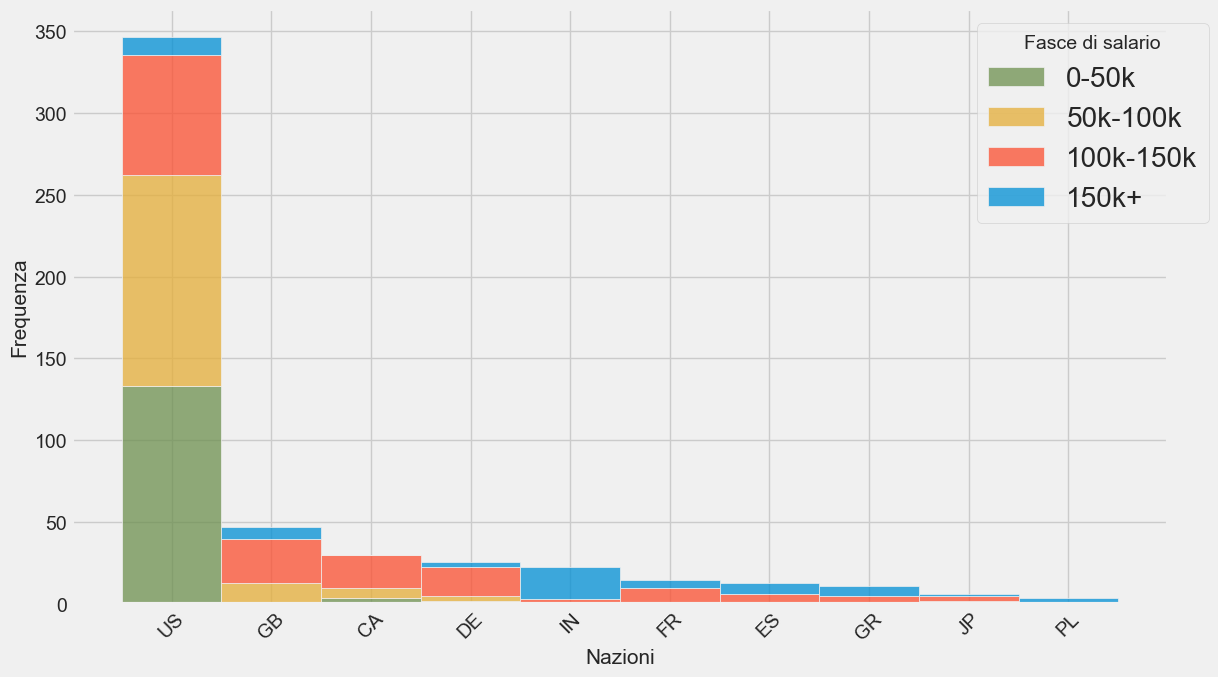

In [34]:
bins = [0, 50000, 100000, 150000, simple_df['salary_in_usd'].max()]
labels = ['0-50k', '50k-100k', '100k-150k', '150k+']


top_locations = stipendi_df['company_location'].value_counts().nlargest(10).index
filtered_df = stipendi_df[stipendi_df['company_location'].isin(top_locations)].copy()

filtered_df['salary_range'] = pd.cut(filtered_df['salary_in_usd'], bins=bins, labels=labels)

location_order = filtered_df['company_location'].value_counts().index

plt.figure(figsize=(12, 7)) 
sns.histplot(data=filtered_df, 
             x=pd.Categorical(filtered_df['company_location'], categories=location_order), 
             kde=False, 
             hue='salary_range', 
             multiple="stack")

plt.xlabel('Nazioni', size = 15)
plt.ylabel('Frequenza', size = 15)
plt.xticks(rotation= 45)
plt.tight_layout()
plt.legend(title='Fasce di salario', labels=labels, bbox_to_anchor=(1.05, 1), loc='upper right', fontsize="x-large")

In [36]:
stipendi_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Data Scientist
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Data Engineer
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,AI Professionals
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,Data Engineer
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,Data Engineer
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,Data Analyst
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,Data Analyst


In [37]:
stipendi_df.work_year.value_counts()

work_year
2022    314
2021    206
2020     68
Name: count, dtype: int64

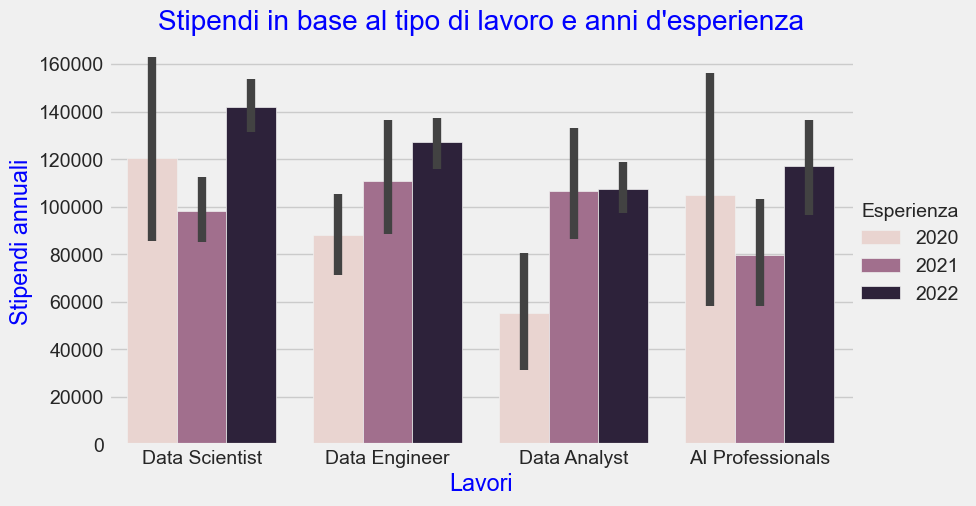

In [38]:
g = sns.catplot(data= stipendi_df, 
            x= "job_category",
            y= 'salary_in_usd',
            kind= "bar", 
            hue= "work_year",
            hue_order=["2020", "2021", "2022"],
            aspect= 16/9,)
g._legend.set_title("Esperienza")

plt.title("Stipendi in base al tipo di lavoro e anni d'esperienza", c= "b")
plt.xlabel('Lavori', c= "b")
plt.ylabel('Stipendi annuali', c= "b");

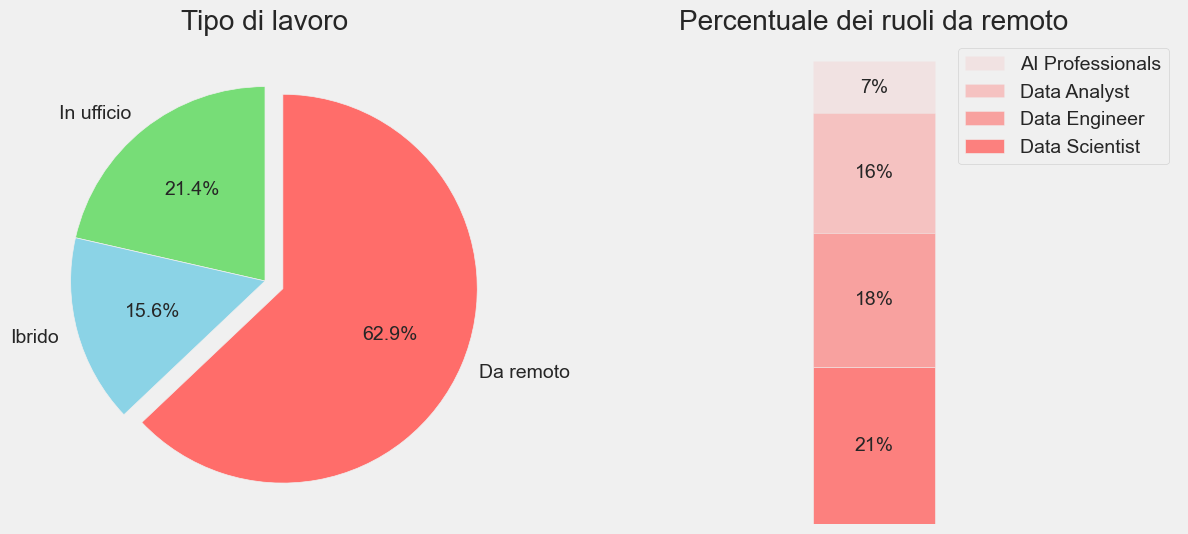

In [39]:
fig, (torta, tabella1) = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(wspace=0)

# Grafico a torta
labels = ["In ufficio", "Ibrido", "Da remoto"]
explode = [0, 0, 0.1] # Esplosione per "Full remote"
angle = 90 # Ruota la torta in modo che "Full remote" sia vicino alla tabella
colors = ["#77dd77","#8BD3E6","#FF6D6A"]
wedges, *_ = torta.pie(lavori_da_remoto, autopct='%1.1f%%', startangle=angle,
                       labels=labels, explode=explode,colors= colors)
torta.set_title("Tipo di lavoro")

# Dati per il grafico a barre per i dettagli della fetta "Full remote"
ratei_lavori = [0.21, 0.18, 0.16, 0.07]
nomi_lavori = ["Data Scientist", "Data Engineer", "Data Analyst", "AI Professionals"]
bottom = 1
width = .2

# Loop per creare le barre impilate
for j, (height, label) in enumerate(reversed([*zip(ratei_lavori, nomi_lavori)])):
    bottom -= height
    alpha_value = min(0.1 + 0.25 * j, 1) # Limita il valore di alpha a 1
    bc = tabella1.bar(0, height, width, bottom=bottom, color="#FF6D6A", label=label,
                      alpha=alpha_value)
    # Aggiunta delle etichette al centro delle barre
    tabella1.bar_label(bc, labels=[f"{float(height):.0%}"], label_type='center')

# Impostazioni del grafico a barre
tabella1.set_title('Percentuale dei ruoli da remoto')
tabella1.legend()
tabella1.axis('off')
tabella1.set_xlim(-2.5 * width, 2.5 * width)
# tabella1.set_color("yellow")

# Collegamento tra la torta e le barre per la fetta "Full remote" (indice 2)
theta1, theta2 = wedges[2].theta1, wedges[2].theta2 # Angoli della fetta "Full remote"
center, r = wedges[2].center, wedges[2].r # Centro e raggio della fetta
bar_height = sum(ratei_lavori) / len(ratei_lavori) # Altezza media delle barre

# Mostra il grafico finale
plt.show()

In [40]:
serie_lavoro = pd.Series()
# Creo una serie che contiene i paesi con la rispettiva media degli stipendi
serie_lavoro = stipendi_df["company_location"].value_counts()
serie_lavoro= serie_lavoro.reset_index()
serie_lavoro["company_location"] = serie_lavoro["company_location"].map(alpha2_to_alpha3)

# Create the choropleth map
fig = px.choropleth(
    serie_lavoro,
    locations="company_location",
    locationmode='ISO-3',
    color='count',
    hover_name="company_location",
    color_continuous_scale=px.colors.sequential.Plasma
)
# Update the layout for better appearance
fig.update_layout(
    title='Heatmap mondiale salario medio',
    geo=dict(
        showframe=False,
        #showcoastlines=False,
        projection_type='equirectangular'
    )
)
# fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
# Show the figure
fig.show()

In [41]:
luogo_dipendenti = pd.Series()
# Creo una serie che contiene i paesi con la rispettiva media degli stipendi
luogo_dipendenti = stipendi_df["employee_residence"].value_counts()
luogo_dipendenti = luogo_dipendenti.reset_index()
luogo_dipendenti["employee_residence"] = luogo_dipendenti["employee_residence"].map(alpha2_to_alpha3)

# Create the choropleth map
fig = px.choropleth(
    luogo_dipendenti,
    locations="employee_residence",
    locationmode='ISO-3',
    color='count',
    hover_name="employee_residence",
    color_continuous_scale=px.colors.sequential.Plasma
)
# Update the layout for better appearance
fig.update_layout(
    title='Heatmap mondiale dipendenti',
    geo=dict(
        showframe=False,
        #showcoastlines=False,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(
        title="Numero dipendenti"
    )
)
# fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
# Show the figure
fig.show()

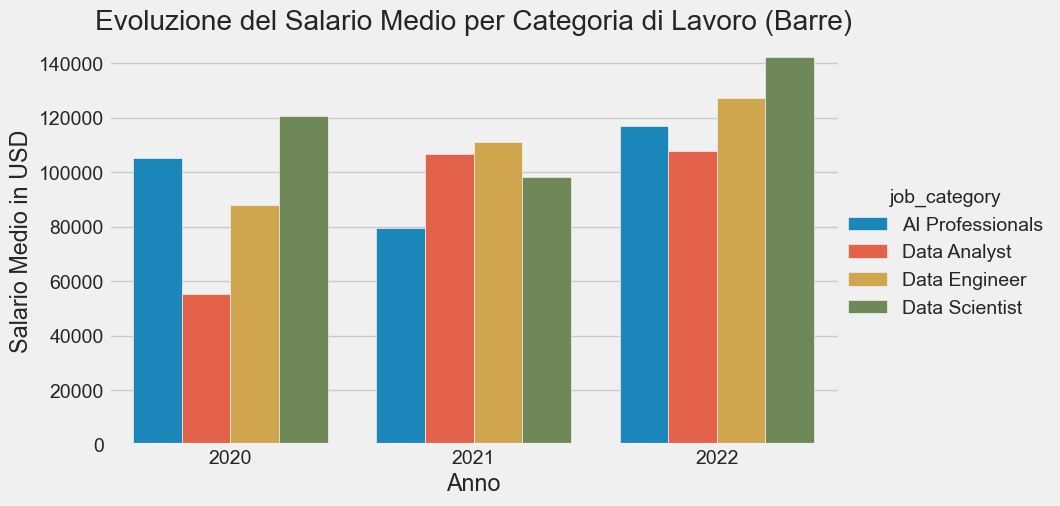

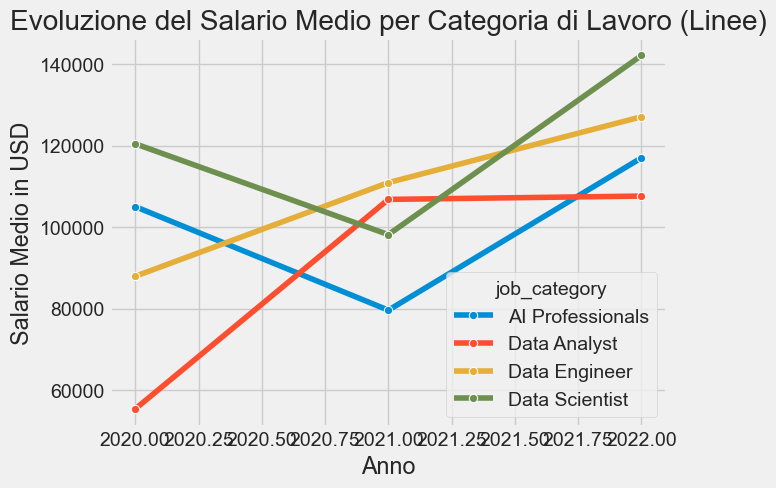

In [42]:

ruoli_per_anno = stipendi_df.groupby(['job_category', 'work_year'], as_index=False)['salary_in_usd'].mean()
ruoli_per_anno.columns = ['job_category', 'work_year', 'avg_salary_in_usd']

sns.catplot(data=ruoli_per_anno, x='work_year', y='avg_salary_in_usd', kind='bar', hue='job_category', aspect=16/9)
plt.title('Evoluzione del Salario Medio per Categoria di Lavoro (Barre)')
plt.xlabel('Anno')
plt.ylabel('Salario Medio in USD')
plt.show()

sns.lineplot(data=ruoli_per_anno, x='work_year', y='avg_salary_in_usd', hue='job_category', marker='o')
plt.title('Evoluzione del Salario Medio per Categoria di Lavoro (Linee)')
plt.xlabel('Anno')
plt.ylabel('Salario Medio in USD')
plt.show()

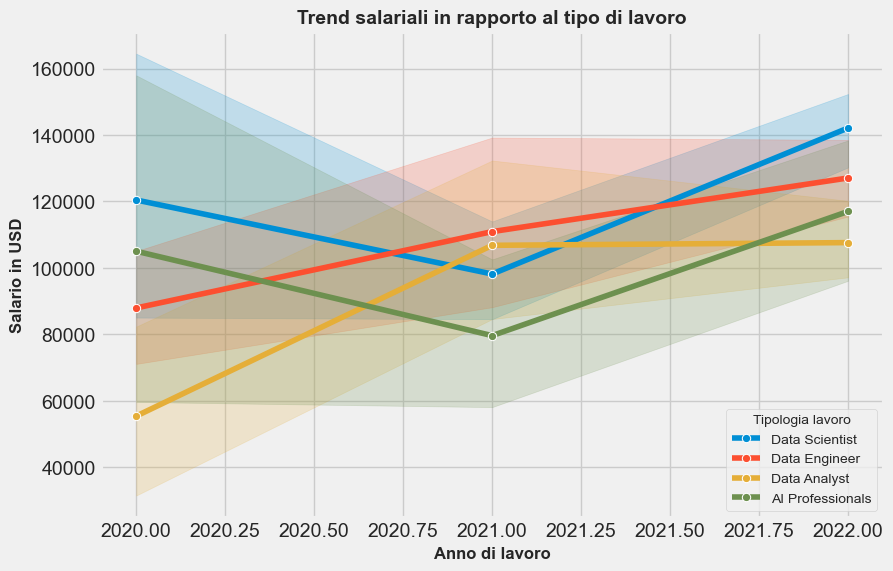

In [43]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=stipendi_df, x='work_year', y='salary_in_usd', hue='job_category',  marker='o')

plt.title('Trend salariali in rapporto al tipo di lavoro', fontsize=14, fontweight='bold')
plt.xlabel('Anno di lavoro', fontsize=12, fontweight='bold')
plt.ylabel('Salario in USD', fontsize=12, fontweight='bold')
plt.legend(title='Tipologia lavoro', title_fontsize=10, fontsize=10, loc='lower right')
# plt.xticks= [2020, 2021, 2022]
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [44]:
stipendi_df.loc(stipendi_df['salary_in_usd'].max())

ValueError: No axis named 600000 for object type DataFrame